/home/zhehaoli/research/SimpleModal


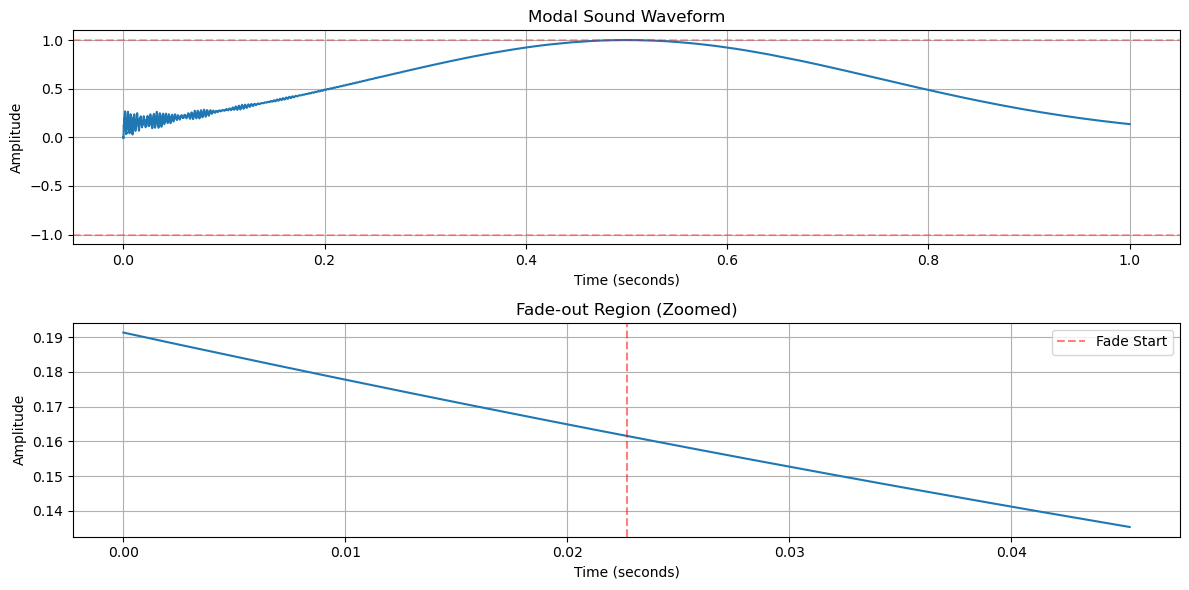

Number of samples: 44100
Duration: 1.000 seconds
Max amplitude: 1.000


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

def read_audio_buffer(file_path):
    """Read the audio buffer from the text file."""
    with open(file_path, 'r') as f:
        data = np.array([float(line.strip()) for line in f.readlines()])
    return data

def plot_waveform(data, sample_rate=44100):
    """Plot the audio waveform."""
    time = np.arange(len(data)) / sample_rate
    
    plt.figure(figsize=(12, 6))
    
    # Main plot
    plt.subplot(211)
    plt.plot(time, data)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('Modal Sound Waveform')
    plt.grid(True)
    
    # Add horizontal lines at y=1 and y=-1
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=-1, color='r', linestyle='--', alpha=0.3)
    
    # Zoom in on the fade-out region
    plt.subplot(212)
    fade_samples = 1000  # Should match FADE_OUT_SAMPLES in AudioManager
    fade_region = data[-fade_samples*2:]  # Show twice the fade length for context
    fade_time = np.arange(len(fade_region)) / sample_rate
    plt.plot(fade_time, fade_region)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.title('Fade-out Region (Zoomed)')
    plt.grid(True)
    
    # Add vertical line where fade-out begins
    plt.axvline(x=fade_time[-fade_samples], color='r', linestyle='--', alpha=0.5, label='Fade Start')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def main():
    # Get the cache directory path
    root_dir = "/home/zhehaoli/research/SimpleModal"
    print(root_dir)
    cache_dir = root_dir + "/build-release/asset/bunny/cache"  # Adjust the path based on your geometry
    audio_file = cache_dir + "/audioBuffer.txt"
    
    # Read and plot the data
    if os.path.exists(audio_file):
        data = read_audio_buffer(audio_file)
        plot_waveform(data)
        
        # Print some statistics
        print(f"Number of samples: {len(data)}")
        print(f"Duration: {len(data)/44100:.3f} seconds")
        print(f"Max amplitude: {np.max(np.abs(data)):.3f}")
    else:
        print(f"Audio file not found at: {audio_file}")

if __name__ == "__main__":
    main() 

/home/zhehaoli/research/SimpleModal
Number of samples: 44100
Duration: 1.000 seconds
Max amplitude: 1.000

Dominant frequencies:


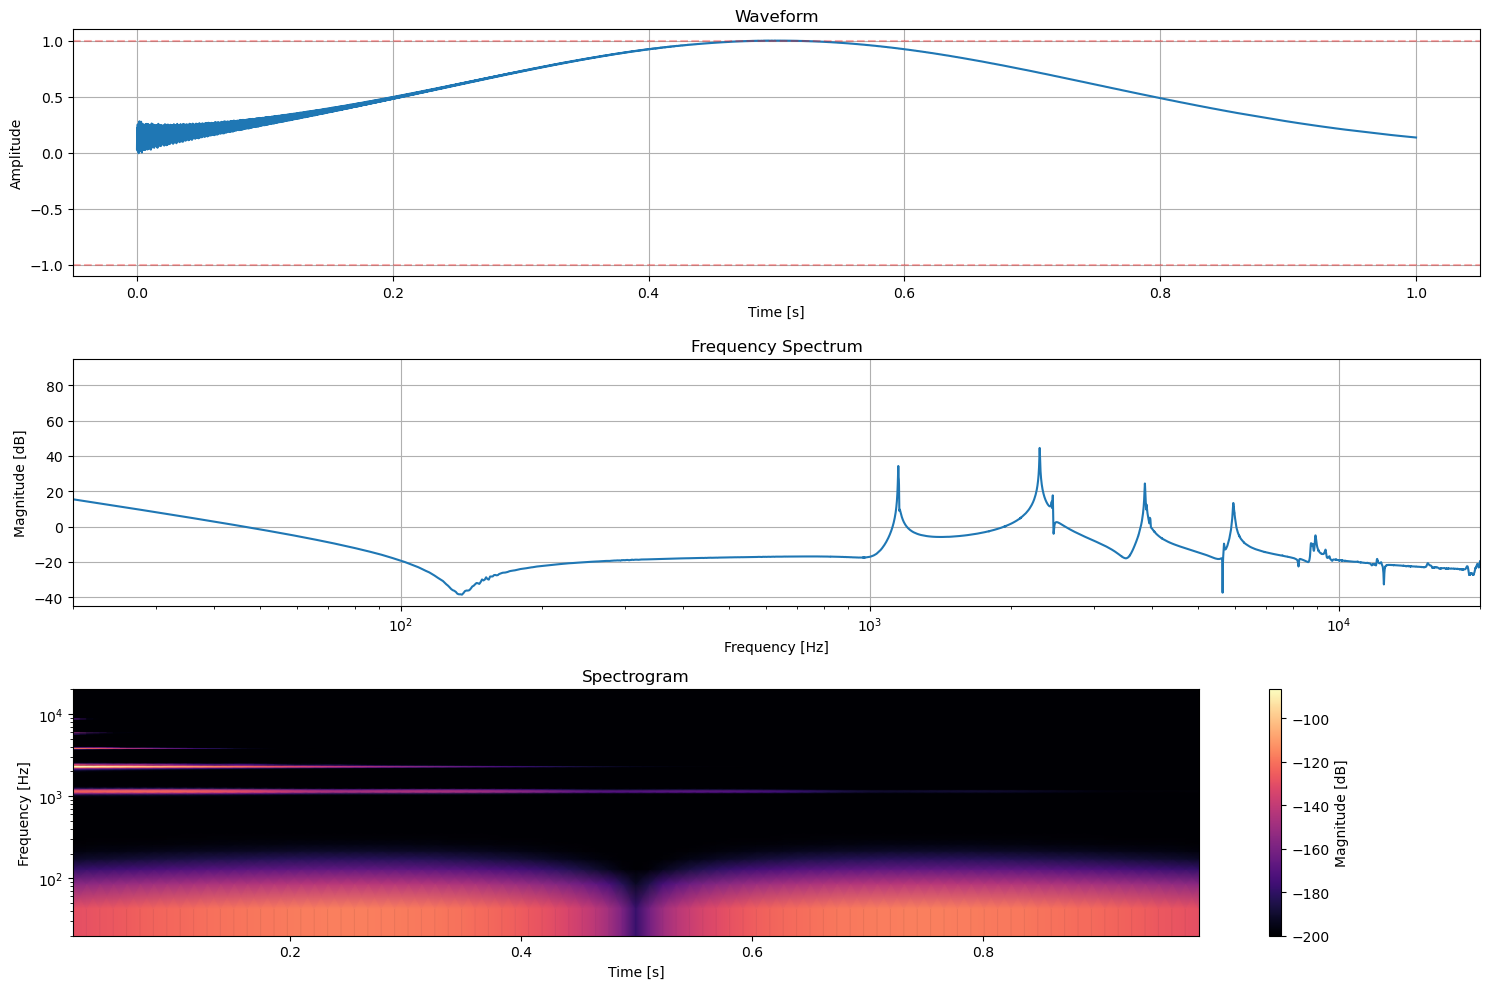

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import os

def read_audio_buffer(file_path):
    """Read the audio buffer from the text file."""
    with open(file_path, 'r') as f:
        data = np.array([float(line.strip()) for line in f.readlines()])
    return data

def plot_spectrogram(data, sample_rate=44100):
    """Plot the spectrogram of the audio data."""
    plt.figure(figsize=(12, 8))
    
    # Calculate spectrogram
    f, t, Sxx = signal.spectrogram(data, fs=sample_rate, 
                                  window='hann',
                                  nperseg=1024,  # FFT window size
                                  noverlap=512,   # Overlap between windows
                                  scaling='magnitude')
    
    # Convert to dB scale
    Sxx_db = 20 * np.log10(Sxx + 1e-10)  # Add small number to avoid log(0)
    
    # Plot spectrogram
    plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='magma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title('Spectrogram')
    plt.colorbar(label='Magnitude [dB]')
    
    # Set y-axis to log scale and limit to audible range
    plt.yscale('log')
    plt.ylim([20, 20000])  # Typical human hearing range
    
    plt.tight_layout()

def plot_waveform_and_spectrum(data, sample_rate=44100):
    """Plot the waveform, spectrum, and spectrogram."""
    fig = plt.figure(figsize=(15, 10))
    
    # Waveform plot
    ax1 = plt.subplot(311)
    time = np.arange(len(data)) / sample_rate
    plt.plot(time, data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.grid(True)
    
    # Add horizontal lines at y=1 and y=-1
    plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
    plt.axhline(y=-1, color='r', linestyle='--', alpha=0.3)
    
    # Spectrum plot
    ax2 = plt.subplot(312)
    freq = np.fft.rfftfreq(len(data), d=1/sample_rate)
    spectrum = np.abs(np.fft.rfft(data))
    plt.plot(freq, 20 * np.log10(spectrum + 1e-10))
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude [dB]')
    plt.title('Frequency Spectrum')
    plt.grid(True)
    plt.xscale('log')
    plt.xlim([20, 20000])  # Typical human hearing range
    
    # Spectrogram
    ax3 = plt.subplot(313)
    f, t, Sxx = signal.spectrogram(data, fs=sample_rate, 
                                  window='hann',
                                  nperseg=1024,
                                  noverlap=512)
    
    # Convert to magnitude and then to dB
    Sxx_mag = np.abs(Sxx)  # Convert to magnitude
    Sxx_db = 20 * np.log10(Sxx_mag + 1e-10)  # Convert to dB
    
    plt.pcolormesh(t, f, Sxx_db, shading='gouraud', cmap='magma')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.title('Spectrogram')
    plt.colorbar(label='Magnitude [dB]')
    plt.yscale('log')
    plt.ylim([20, 20000])
    
    plt.tight_layout()
    return fig

def main():
    # Get the cache directory path
    root_dir = "/home/zhehaoli/research/SimpleModal"
    print(root_dir)
    cache_dir = root_dir + "/build-release/asset/plate/cache"  # Adjust the path based on your geometry
    audio_file = cache_dir + "/audioBuffer.txt"
    
    # Read and plot the data
    if os.path.exists(audio_file):
        data = read_audio_buffer(audio_file)
        
        # Create plots
        plot_waveform_and_spectrum(data)
        
        # Print some statistics
        print(f"Number of samples: {len(data)}")
        print(f"Duration: {len(data)/44100:.3f} seconds")
        print(f"Max amplitude: {np.max(np.abs(data)):.3f}")
        
        # Calculate and print dominant frequencies
        freq = np.fft.rfftfreq(len(data), d=1/44100)
        spectrum = np.abs(np.fft.rfft(data))
        peak_indices = signal.find_peaks(spectrum, height=max(spectrum)*0.1)[0]
        peak_freqs = freq[peak_indices]
        peak_mags = spectrum[peak_indices]
        
        print("\nDominant frequencies:")
        for f, m in sorted(zip(peak_freqs, peak_mags), key=lambda x: x[1], reverse=True)[:5]:
            print(f"  {f:.1f} Hz (magnitude: {20*np.log10(m):.1f} dB)")
        
        plt.show()
    else:
        print(f"Audio file not found at: {audio_file}")

if __name__ == "__main__":
    main() 